## SMOTE (Synthetic Minority Oversampling Technique)

In [1]:
from sklearn.datasets import make_classification


In [7]:
X, Y = make_classification(n_samples=1000,
                    n_redundant=0,
                    n_features=2,
                    n_clusters_per_class=1,
                    weights=[0.90],
                    random_state=12
                    )

print(len(X))

1000


In [8]:
import pandas as pd
df1 = pd.DataFrame(X, columns=['feature1', 'feature2'])
df2 = pd.DataFrame(Y, columns=['target'])

print(df1)
print(df2)

df_final = pd.concat([df1, df2], axis=1)

     feature1  feature2
0   -0.762898 -0.706808
1   -1.075436 -1.051162
2   -0.610115 -0.909802
3   -2.023284 -0.428945
4   -0.812921 -1.316206
..        ...       ...
995 -0.712495 -0.880452
996 -2.625830 -2.827891
997 -1.326439 -1.815178
998 -0.833486 -0.514647
999 -0.302876 -0.575975

[1000 rows x 2 columns]
     target
0         0
1         0
2         0
3         1
4         0
..      ...
995       0
996       0
997       0
998       0
999       0

[1000 rows x 1 columns]


In [9]:
print(df_final)

     feature1  feature2  target
0   -0.762898 -0.706808       0
1   -1.075436 -1.051162       0
2   -0.610115 -0.909802       0
3   -2.023284 -0.428945       1
4   -0.812921 -1.316206       0
..        ...       ...     ...
995 -0.712495 -0.880452       0
996 -2.625830 -2.827891       0
997 -1.326439 -1.815178       0
998 -0.833486 -0.514647       0
999 -0.302876 -0.575975       0

[1000 rows x 3 columns]


In [10]:
df_final['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

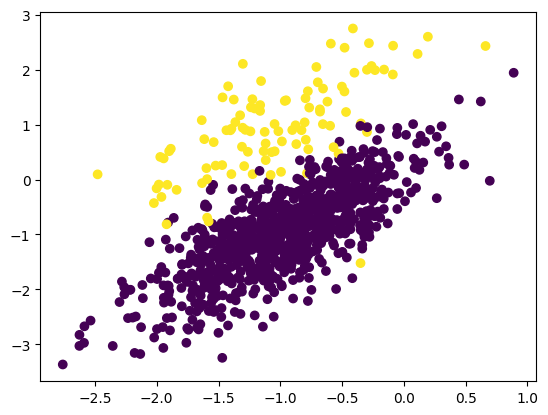

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df_final['feature1'], df_final['feature2'], c=df_final['target'])

### apply smote

In [12]:
from imblearn.over_sampling import SMOTE

#### transform the dataset

In [13]:
oversample = SMOTE()
X, Y = oversample.fit_resample(df_final[['feature1', 'feature2']], df_final['target'])

In [15]:
Y.shape

(1800,)

In [23]:
print(len(Y[Y == 1]))
print(len(Y[Y == 0]))

900
900


In [26]:
df1 = pd.DataFrame(X, columns=['feature1', 'feature2'])
df2 = pd.DataFrame(Y, columns=['target'])

oversampled_df = pd.concat([df1, df2], axis=1)
print(oversampled_df)

      feature1  feature2  target
0    -0.762898 -0.706808       0
1    -1.075436 -1.051162       0
2    -0.610115 -0.909802       0
3    -2.023284 -0.428945       1
4    -0.812921 -1.316206       0
...        ...       ...     ...
1795 -1.978750 -0.144007       1
1796 -1.891932 -0.093698       1
1797 -0.507254  1.278174       1
1798 -0.128615  2.446005       1
1799 -0.308165  0.869189       1

[1800 rows x 3 columns]


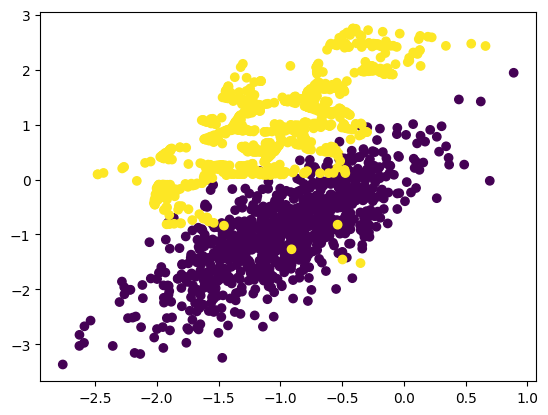

In [27]:
plt.scatter(oversampled_df['feature1'], oversampled_df['feature2'], c=oversampled_df['target'])